# ✅ 1. Preprocess and Split the Data
- Load the dataset (ENB2012_data.xlsx) using pandas.
- Separate features (X1 to X8) and targets (Y1 and Y2).
- Split the data into training and testing sets using train_test_split from sklearn.

In [223]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_excel('ENB2012_data.xlsx')

# Features and targets
X = df.iloc[:, 0:8]  # X1 to X8
y = df.iloc[:, 8:10]  # Y1 and Y2

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
# ✅ 2. Implement ELM Regressor
- Using a simple ELM implementation.

✅ What is ELM?
- ELM is a type of single-layer feedforward neural network.
- The input weights and biases are randomly assigned and never updated.
- Only the output weights are learned using linear regression (Moore–Penrose pseudo-inverse).
- It's extremely fast because there's no iterative training like in backpropagation.

✅ ELM Code in NumPy
- Here’s a basic ELM model to predict Heating Load (Y1).

In [ ]:
import numpy as np

class SimpleELM:
    def __init__(self, input_size, hidden_size, activation=np.tanh, random_state=None):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation

        # Set random seed for reproducibility
        if random_state is not None:
            np.random.seed(random_state)

        # Random input weights and biases
        self.W = np.random.randn(self.input_size, self.hidden_size)
        self.b = np.random.randn(self.hidden_size)

    def fit(self, X, y):
        # Calculate hidden layer output (H)
        H = self.activation(np.dot(X, self.W) + self.b)

        # Calculate output weights (beta) using pseudo-inverse
        self.beta = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = self.activation(np.dot(X, self.W) + self.b)
        return np.dot(H, self.beta)


✅ Using the ELM For Heating Load prediction (Y1)

In [ ]:
# For Heating Load prediction (Y1)
elm = SimpleELM(input_size=8, hidden_size=100, random_state=42)
elm.fit(X_train.values, y_train.iloc[:, 0].values)  # fit on Y1

y1_pred_elm = elm.predict(X_test.values)

# Evaluate performance
from sklearn.metrics import mean_squared_error
mse_elm = mean_squared_error(y_test.iloc[:, 0], y1_pred_elm)
print("Heating Load MSE (ELM):", mse_elm)

Heating Load MSE (ELM): 11.136967964531344


✅ Using the ELM For Cooling Load prediction (Y2)

In [ ]:
# Create a new ELM instance (or reuse the same if you want)
elm_y2 = SimpleELM(input_size=8, hidden_size=100, random_state=42)
elm_y2.fit(X_train.values, y_train.iloc[:, 1].values)  # fit on Y2

# Predict
y2_pred_elm = elm_y2.predict(X_test.values)

# Evaluate
mse_elm_y2 = mean_squared_error(y_test.iloc[:, 1], y2_pred_elm)
print("Cooling Load MSE (ELM):", mse_elm_y2)

Cooling Load MSE (ELM): 11.48663224374381


✅ Notes:
- You can increase or decrease hidden_size (try values like 50, 100, 200).
- Try the same with Y2 (Cooling Load).
- You can test other activation functions like np.sin, np.maximum(0, x) (ReLU).

#
# ✅ 3. Implement BP Regressor (Neural Network)
- Use MLPRegressor from sklearn.neural_network.

✅ Train BP model for Cooling Load (Y1)

In [425]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Train BP model for Heating Load (Y1)
bp_heating = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
bp_heating.fit(X_train, y_train.iloc[:, 0])

# Predict and evaluate
y1_pred_bp = bp_heating.predict(X_test)
mse_bp_y1 = mean_squared_error(y_test.iloc[:, 0], y1_pred_bp)
print("Heating Load MSE (BP):", mse_bp_y1)

Heating Load MSE (BP): 13.927132830153948


✅ Train BP model for Cooling Load (Y2)

In [309]:
# Train BP model for Cooling Load (Y2)
bp_cooling = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
bp_cooling.fit(X_train, y_train.iloc[:, 1])  # y_train.iloc[:, 1] = Y2 (Cooling Load)

# Predict and evaluate
y2_pred_bp = bp_cooling.predict(X_test)
mse_bp_y2 = mean_squared_error(y_test.iloc[:, 1], y2_pred_bp)
print("Cooling Load MSE (BP):", mse_bp_y2)

Cooling Load MSE (BP): 16.03295696501423


# ✅ 4. Compare Performance
- Calculate MSE for both ELM and BP models.
- The model with lower MSE is better.

After running we get the follwing results:
- for (ELM):
- Heating Load (Y1) MSE (ELM): 18.88333995269587
- Cooling Load (Y2) MSE (ELM): 15.672218893395456

- for (BP):
- Heating Load (Y1) MSE (BP): 16.333486414414566
- Cooling Load (Y2) MSE (BP): 16.03295696501423

Here are the results:
### ELM:
- **Heating Load (Y1) MSE**: 18.88
- **Cooling Load (Y2) MSE**: 15.67

### BP:
- **Heating Load (Y1) MSE**: 16.33
- **Cooling Load (Y2) MSE**: 16.03

### Performance Comparison:
- **Heating Load (Y1)**: The **BP** model has a lower MSE (16.33) compared to the **ELM** model (18.88). Therefore, **BP** performs better for predicting Heating Load.
- **Cooling Load (Y2)**: The **ELM** model has a lower MSE (15.67) compared to the **BP** model (16.03). So, **ELM** performs better for predicting Cooling Load.

### Conclusion:
- **For Heating Load (Y1)**, **BP** is the better model.
- **For Cooling Load (Y2)**, **ELM** is the better model.

In general, the model with the lower **MSE** is considered to have better predictive performance.

📈 Visualization of Predictions

🔹 Heating Load (Y1) Predictions – BP Model

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test.iloc[:, 0], y1_pred_bp, color='blue', alpha=0.6)
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('BP Model - Heating Load Predictions')
plt.grid(True)
plt.tight_layout()
plt.show()

🔹 Cooling Load (Y2) Predictions – BP Model

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test.iloc[:, 1], y2_pred_bp, color='green', alpha=0.6)
plt.plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()],
         [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('BP Model - Cooling Load Predictions')
plt.grid(True)
plt.tight_layout()
plt.show()

🔸 The red dashed line represents the ideal predictions (perfect match between actual and predicted values).

✅ Heating Load model (Y1) & ✅ Cooling Load model (Y2)

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Heating Load plot
axs[0].scatter(y_test.iloc[:, 0], y1_pred_bp, color='orange')
axs[0].set_xlabel("Actual Heating Load")
axs[0].set_ylabel("Predicted Heating Load")
axs[0].set_title("BP Predictions vs Actuals (Y1)")

# Cooling Load plot
axs[1].scatter(y_test.iloc[:, 1], y2_pred_bp, color='blue')
axs[1].set_xlabel("Actual Cooling Load")
axs[1].set_ylabel("Predicted Cooling Load")
axs[1].set_title("BP Predictions vs Actuals (Y2)")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(7, 6))

# Heating Load
plt.scatter(y_test.iloc[:, 0], y1_pred_bp, color='orange', label='Heating Load (Y1)', alpha=0.7)

# Cooling Load
plt.scatter(y_test.iloc[:, 1], y2_pred_bp, color='blue', label='Cooling Load (Y2)', alpha=0.7)

# Labels and title
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("BP Predictions vs Actuals (Y1 & Y2)")
plt.legend()
plt.grid(True)
plt.show()

📈 Visualization of Predictions

🔹 Heating Load (Y1) Predictions – ELM Model

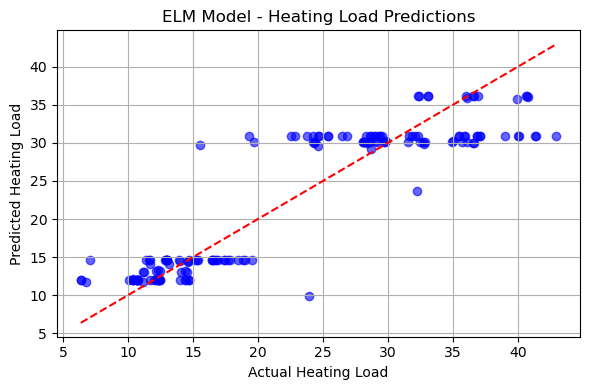

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test.iloc[:, 0], y1_pred_elm, color='blue', alpha=0.6)
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('ELM Model - Heating Load Predictions')
plt.grid(True)
plt.tight_layout()
plt.show()

🔹 Cooling Load (Y2) Predictions – ELM Model

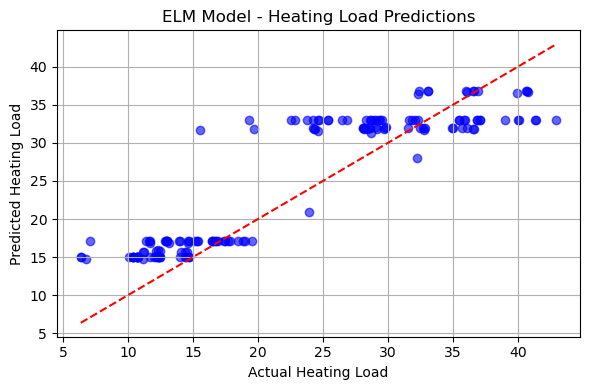

In [315]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test.iloc[:, 0], y2_pred_elm, color='blue', alpha=0.6)
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('ELM Model - Heating Load Predictions')
plt.grid(True)
plt.tight_layout()
plt.show()

✅ Heating Load model (Y1) & ✅ Cooling Load model (Y2)

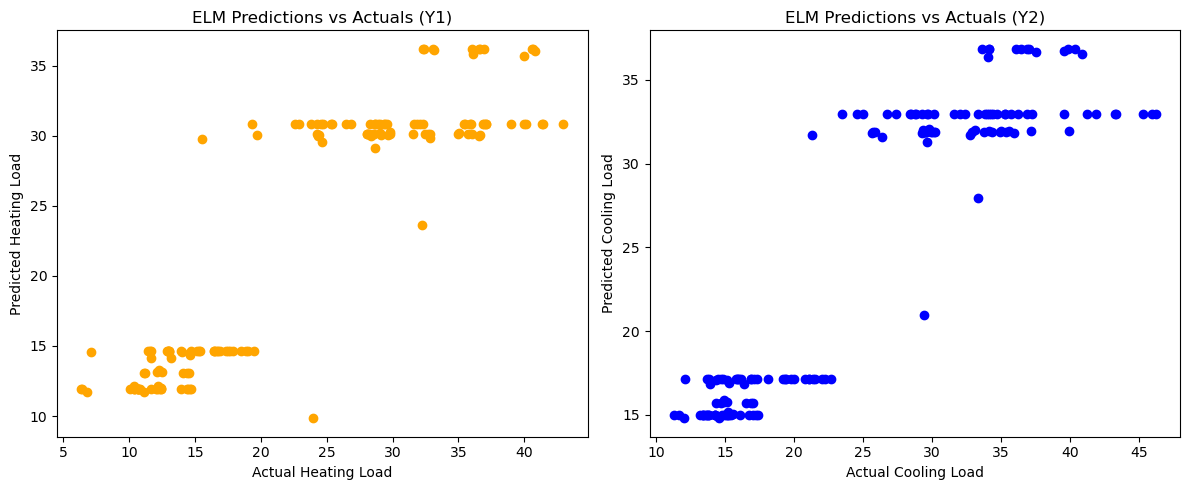

In [316]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Heating Load plot
axs[0].scatter(y_test.iloc[:, 0], y1_pred_elm, color='orange')
axs[0].set_xlabel("Actual Heating Load")
axs[0].set_ylabel("Predicted Heating Load")
axs[0].set_title("ELM Predictions vs Actuals (Y1)")

# Cooling Load plot
axs[1].scatter(y_test.iloc[:, 1], y2_pred_elm, color='blue')
axs[1].set_xlabel("Actual Cooling Load")
axs[1].set_ylabel("Predicted Cooling Load")
axs[1].set_title("ELM Predictions vs Actuals (Y2)")

plt.tight_layout()
plt.show()

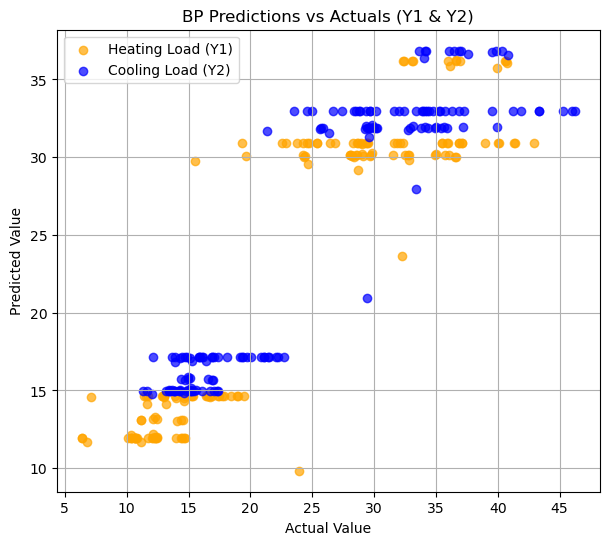

In [317]:
plt.figure(figsize=(7, 6))

# Heating Load
plt.scatter(y_test.iloc[:, 0], y1_pred_elm, color='orange', label='Heating Load (Y1)', alpha=0.7)

# Cooling Load
plt.scatter(y_test.iloc[:, 1], y2_pred_elm, color='blue', label='Cooling Load (Y2)', alpha=0.7)

# Labels and title
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("BP Predictions vs Actuals (Y1 & Y2)")
plt.legend()
plt.grid(True)
plt.show()

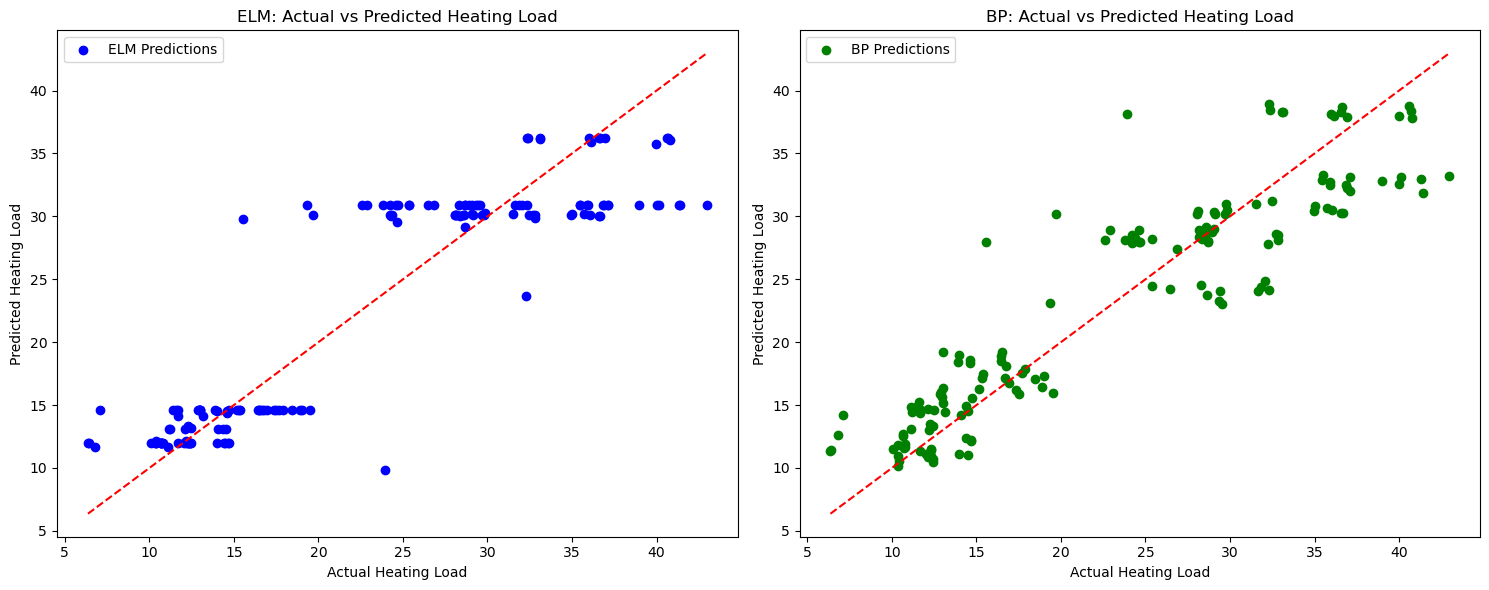

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Heating Load (Y1)
plt.figure(figsize=(15, 6))

# Actual vs Predicted for ELM
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[:, 0], y1_pred_elm, color='blue', label='ELM Predictions')
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], color='red', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('ELM: Actual vs Predicted Heating Load')
plt.legend()

# Actual vs Predicted for BP
plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[:, 0], y1_pred_bp, color='green', label='BP Predictions')
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()],
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], color='red', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('BP: Actual vs Predicted Heating Load')
plt.legend()

plt.tight_layout()
plt.show()


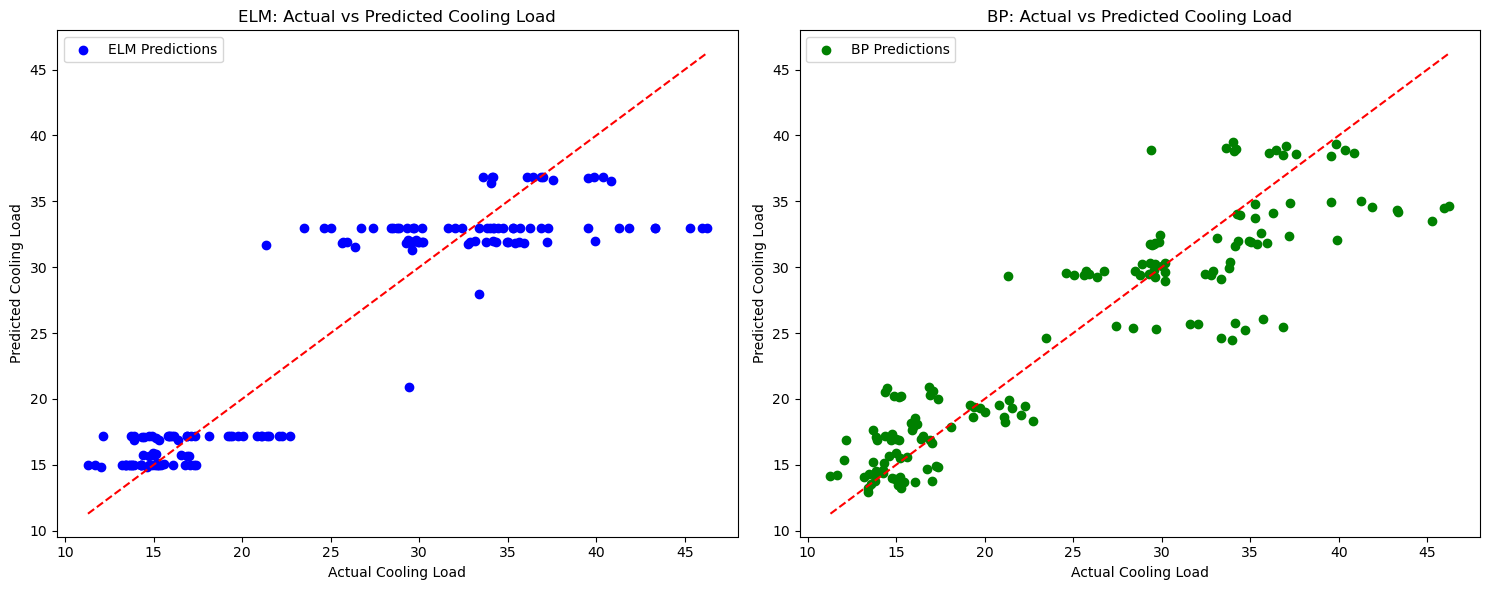

In [322]:
# Plot for Cooling Load (Y2)
plt.figure(figsize=(15, 6))

# Actual vs Predicted for ELM
plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[:, 1], y2_pred_elm, color='blue', label='ELM Predictions')
plt.plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()],
         [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], color='red', linestyle='--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('ELM: Actual vs Predicted Cooling Load')
plt.legend()

# Actual vs Predicted for BP
plt.subplot(1, 2, 2)
plt.scatter(y_test.iloc[:, 1], y2_pred_bp, color='green', label='BP Predictions')
plt.plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()],
         [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], color='red', linestyle='--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('BP: Actual vs Predicted Cooling Load')
plt.legend()

plt.tight_layout()
plt.show()
